# Workflow testing


In [1]:
import sys
import os
import json

import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

from matplotlib.path import Path
from matplotlib.patches import PathPatch

%matplotlib ipympl

import warnings
warnings.filterwarnings('ignore', module='numpy')
warnings.filterwarnings('ignore')

import importlib
try:
    import bumps
    from bumps import dream
    HAS_BUMPS  = True
except:
    print("No bumps")
    HAS_BUMPS = False

if HAS_BUMPS:
    from tron.bayesian_analysis import fit_uncertainties
    importlib.reload(fit_uncertainties)

from tron.bayesian_analysis import summary_plots, model_utils, template

In [2]:
# Data analysis directory
project_dir = os.path.expanduser('~/git/TrON/example_analysis')

# Upper-level data directory for the time-resolved data
data_dir = os.path.join(project_dir, 'data')

# Directory where we store dynamic fit results
dyn_model_dir = os.path.join(project_dir, 'dyn-fitting')

dynamic_run = 207168 # Cycle 1

dyn_fit_dir = os.path.join(dyn_model_dir, '207168-dyn/results-30s-bck')



In [17]:
from tron.bayesian_analysis import template, fitting_loop
importlib.reload(template)
importlib.reload(fitting_loop)

init_json = os.path.join(project_dir, 'dyn-fitting', '207161', '207161_model-1-expt.json') 
final_json = os.path.join(project_dir, 'dyn-fitting', '207169', '207169_model-1-expt.json')

template_str = template.create_model(final_json)
cwd = os.getcwd()
model_file = os.path.join(cwd, 'model-loop-tmp.py')
with open(model_file, 'w') as fd:
    fd.write(template_str)

fitting_loop.execute_fit(dynamic_run, data_dir, model_file, init_json, final_json, dyn_fit_dir, fit_forward=False)


Model: /SNS/users/m2d/git/TrON/example_analysis/notebooks/model-loop-tmp
Data: /SNS/users/m2d/git/TrON/example_analysis/data
Results: /SNS/users/m2d/git/TrON/example_analysis/dyn-fitting/207168-dyn/results-30s-bck
Initial state: /SNS/users/m2d/git/TrON/example_analysis/dyn-fitting/207161/207161_model-1-expt.json
Final state: /SNS/users/m2d/git/TrON/example_analysis/dyn-fitting/207169/207169_model-1-expt.json
                   Initial 	            Step
   Cu interface    10.2 +- 0.14    	    10.8 +- 0.18   
         Cu rho    6.48 +- 0.021  
   Cu thickness     559 +- 1.5     	     561 +- 0.64   
  THF interface    29.2 +- 2.2     	    56.5 +- 1.8    
   Ti interface    6.37 +- 0.27    	    2.19 +- 0.55   
         Ti rho   -2.18 +- 0.036   	  -0.427 +- 0.027  
   Ti thickness    51.4 +- 0.15    	    56.1 +- 0.21   
material interface    18.8 +- 1.3     	    12.1 +- 0.78   
   material rho    3.59 +- 0.68    	    3.78 +- 0.18   
material thickness    31.3 +- 6.7     	    48.3 +- 10    

23


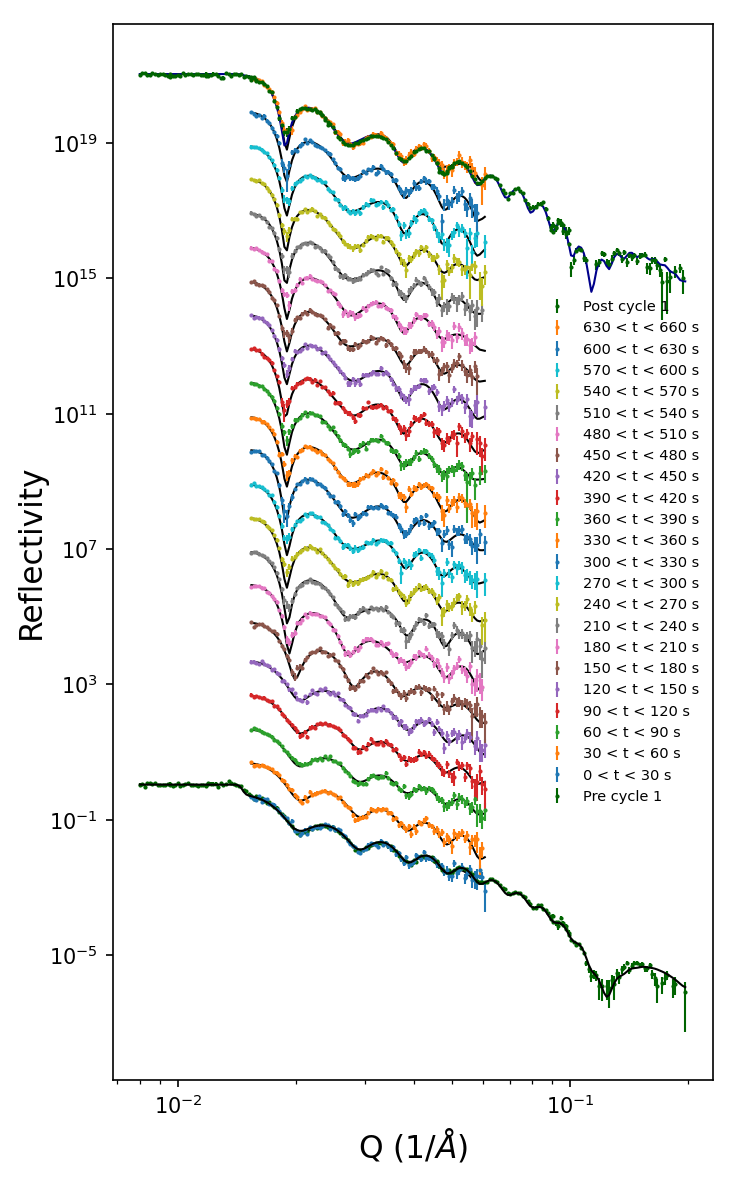

In [18]:
from tron.bayesian_analysis import summary_plots
importlib.reload(summary_plots)

initial_state = init_json.replace('expt.json', 'refl.dat')
final_state = final_json.replace('expt.json', 'refl.dat')

plotted_data = summary_plots.plot_dyn_data(dynamic_run, initial_state, final_state,
                                           dyn_data_dir=data_dir, dyn_fit_dir=dyn_fit_dir,
                                           model_name='model-loop-tmp-1', scale=1)


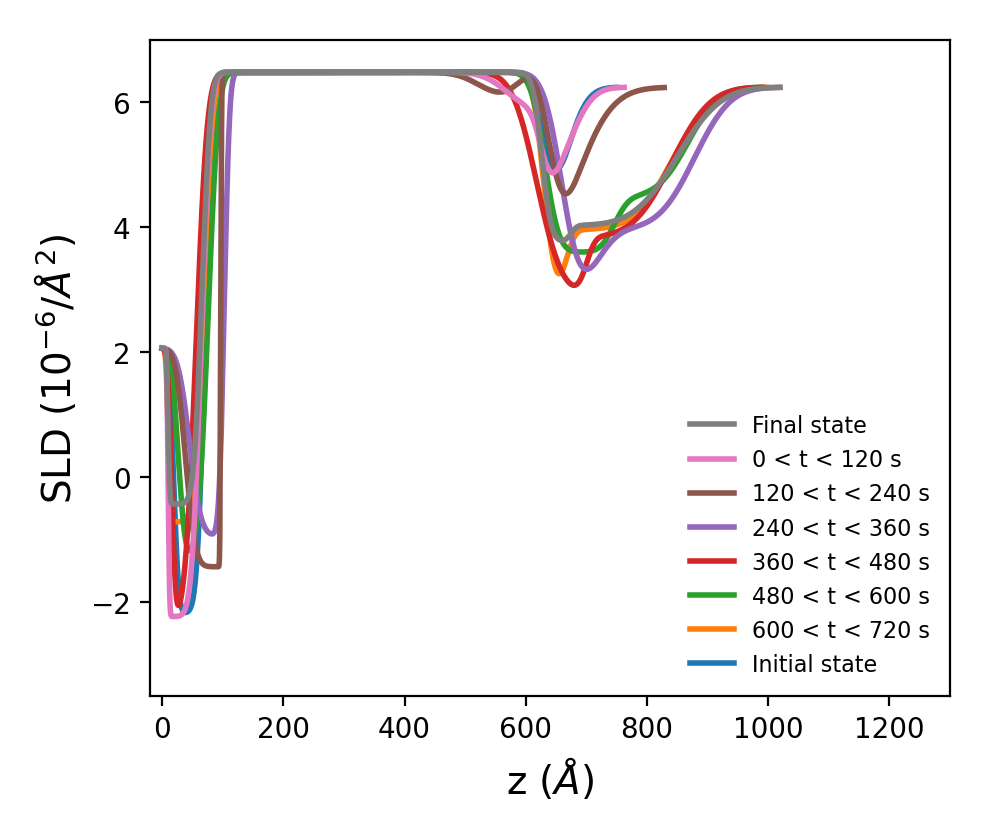

In [22]:
importlib.reload(summary_plots)
importlib.reload(model_utils)

initial_state = init_json.replace('expt.json', 'profile.dat')
final_state = final_json.replace('expt.json', 'profile.dat')

data_list = [plotted_data[i] for i in range(0, len(plotted_data), 4)]
summary_plots.plot_dyn_sld(data_list, initial_state, final_state,
                           dyn_fit_dir=dyn_fit_dir, 
                           show_cl=False, model_name='model-loop-tmp-1', legend_font_size=8, max_z=1300, sld_range=[-3.5, 7])
plt.savefig('dyn_sld.svg')